In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import numpy as np

In [16]:
def gen_table():
    table = pd.DataFrame(columns=['Method', 'Improvement', 'Std', 'Size', 'Noise'])
    for i, file in enumerate(listdir('final_results/')):
        df = pd.read_csv('final_results/'+file, names=['iteration', 'timestamp','fitness','dataset','matrix','algo'])
        starts = df.groupby('matrix').first()['fitness']
        ends = df.groupby('matrix').last()['fitness']
        x = (starts-ends)/starts*100
        table.loc[i] = [file.split('_')[1][4], x.mean(), x.std(), int(file.split('_')[3][1:]), int(file.split('_')[4][3:5])]
    return table.sort_values(by=['Size', 'Noise', 'Method'])

In [17]:
gen_table()

,Method,Improvement,Std,Size,Noise
46,1,6.063310,7.046440,10,10
24,2,5.589004,6.031046,10,10
29,3,2.082836,4.536878,10,10
42,4,6.094030,6.985837,10,10
12,5,5.628405,6.318326,10,10
30,1,8.385759,4.799725,10,25
54,2,8.242214,4.778738,10,25
50,3,1.579686,1.533244,10,25
48,4,8.162998,4.757612,10,25
5,5,7.951868,4.373968,10,25


In [18]:
# Plot Algorithm improvement by noise in each of the possible matrix sizes
def plot1():
    results = gen_table()
    f, ax = plt.subplots(4, figsize=(10, 10), sharey=True, sharex=True)

    pd.pivot_table(results.loc[results.Size==10], values='Improvement', index='Method', columns='Noise').plot(ax=ax[0], marker='s', title='Matrix Size 10')
    pd.pivot_table(results.loc[results.Size==15], values='Improvement', index='Method', columns='Noise').plot(ax=ax[1], marker='s', title='Matrix Size 15')
    pd.pivot_table(results.loc[results.Size==20], values='Improvement', index='Method', columns='Noise').plot(ax=ax[2], marker='s', title='Matrix Size 20')
    pd.pivot_table(results.loc[results.Size==25], values='Improvement', index='Method', columns='Noise').plot(ax=ax[3], marker='s', title='Matrix Size 25')
    
    for axis in ax:
        axis.set_ylabel('Improvement')
    plt.tight_layout()
    plt.savefig('plot1.png')
    

In [26]:
# Plot Algorithm improvement by Matrix Size in each of the possible Noises
def plot2():
    results = gen_table()
    f, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
   
    pd.pivot_table(results.loc[results.Noise==10], values='Improvement', index='Size', columns='Method').plot(ax=ax[0], marker='s', title='Noise 10')
    pd.pivot_table(results.loc[results.Noise==25], values='Improvement', index='Size', columns='Method').plot(ax=ax[1], marker='s', title='Noise 25')
    pd.pivot_table(results.loc[results.Noise==50], values='Improvement', index='Size', columns='Method').plot(ax=ax[2], marker='s', title='Noise 50')
    for axis in ax:
        axis.set_ylabel('Improvement % over NJ')
    plt.xticks([10, 15, 20, 25])
    plt.tight_layout()
    plt.savefig('plot2.png')
    

In [27]:
#plot1()
plot2()

In [29]:
def gen_table2():
    table = pd.DataFrame(columns=['Method', 'Improvement', 'Size', 'Iteration'])
    table2 = pd.DataFrame(columns=['iteration', 'timestamp','fitness','dataset','matrix','algo'])
    dict_ = {}
    for i, file in enumerate(listdir('final_results/')):
        if file.endswith("data_n25_std25.csv"):
            df = pd.read_csv('final_results/'+file, names=['iteration', 'timestamp','fitness','dataset','matrix','algo'])
            df2 = pd.pivot_table(df, index='iteration', values='fitness', columns='matrix').apply(lambda x: 100-100*x/x.iloc[0])
            dict_['Algorithm ' + file.split('_')[1][4]] = df2.mean(axis=1)
    frame = pd.DataFrame(dict_)
    print frame.head()

    #frame = pd.pivot_table(frame, index='iteration', values='fitness', columns='algo')
    #print frame.head()
    frame.plot()
    plt.show()
    
            
            #pct = df.groupby('matrix')['fitness'].transform(lambda x: (x / x.iloc[0]))
            #print(pct.shape)
            #print(pct.head())
            #table2[file.split('_')[1][4]] = 100 - pct*100
            #print((1-pct)*100)
        #print table2.shape
    #print(starts.head(7))
    #table.loc[i] = [file.split('_')[1][4], 100-pct*100, int(file.split('_')[3][1:]), df['iteration']]
    #print(table2.tail())
    #table2.reset_index().plot(x='index', y=['1', '2', '3', '4', '5'])
    #print(table2.shape)
    #plt.show()
    #return table.sort_values(by=['Size', 'Algorithm'])

            Algorithm 1   Algorithm 2  Algorithm 3   Algorithm 4   Algorithm 5
iteration                                                                     
0.0       -2.842171e-15  1.421085e-15     0.000000  2.842171e-15  1.421085e-15
1.0        3.103954e-02  6.041272e-02     0.076819  7.895682e-02  8.660348e-02
2.0        8.588836e-02  1.212041e-01     0.104221  1.138602e-01  1.571326e-01
3.0        1.261414e-01  1.697362e-01     0.149708  1.322132e-01  2.430190e-01
4.0        1.809179e-01  2.487734e-01     0.228855  1.724405e-01  2.809813e-01


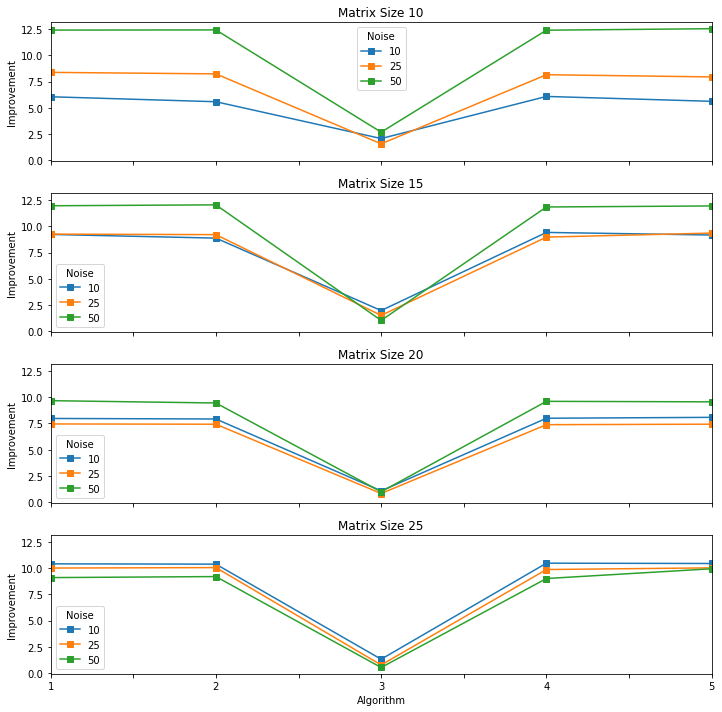

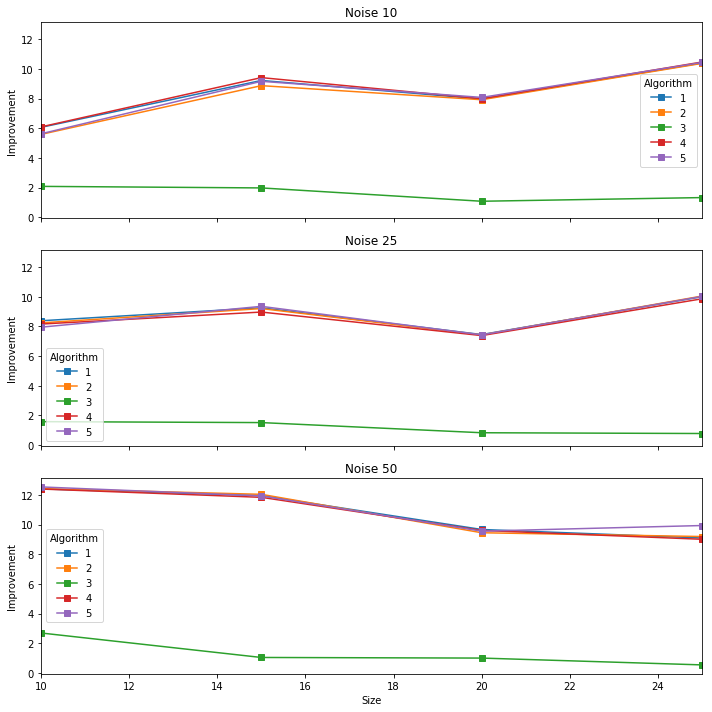

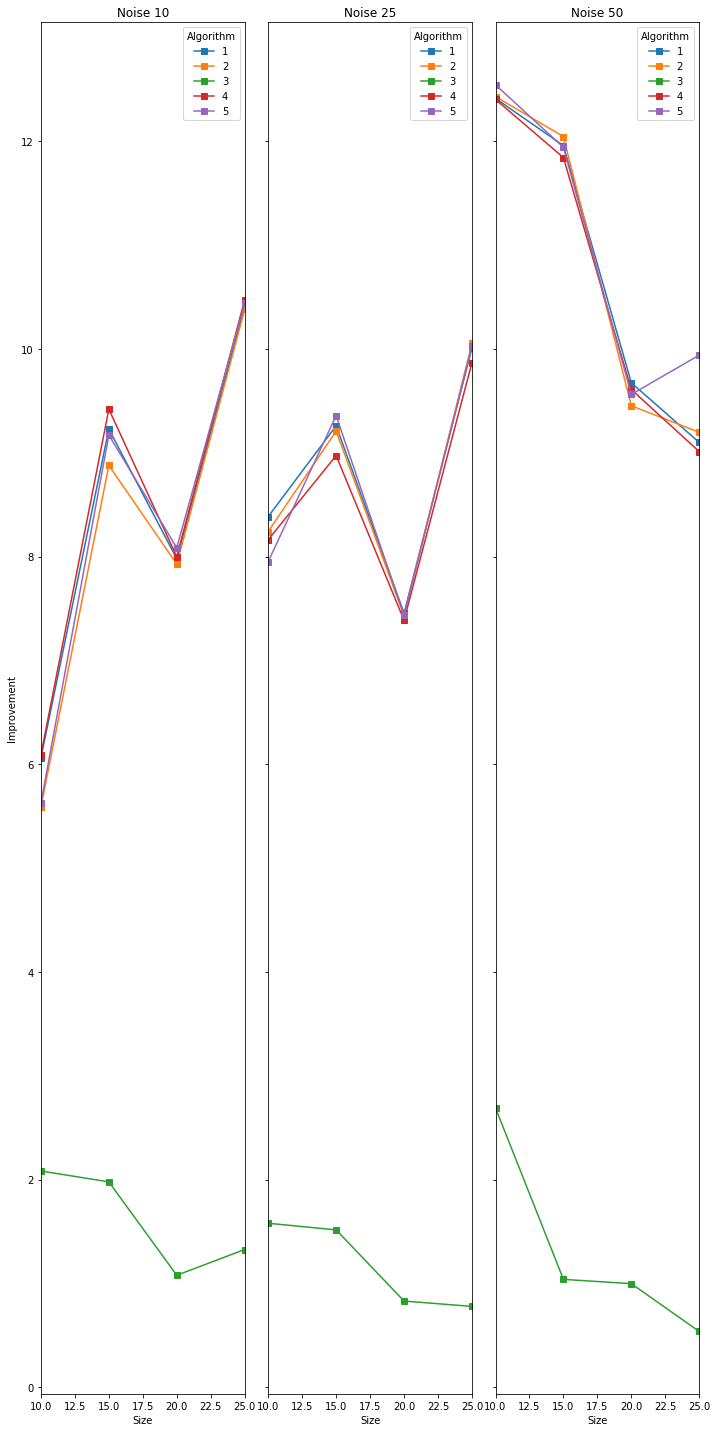

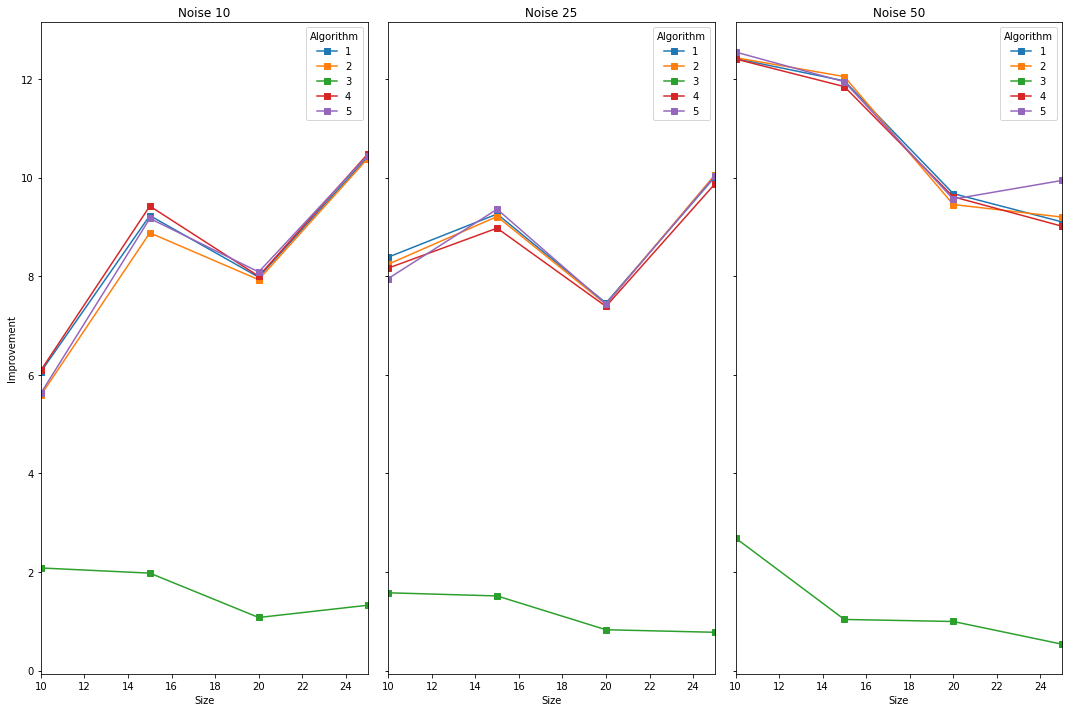

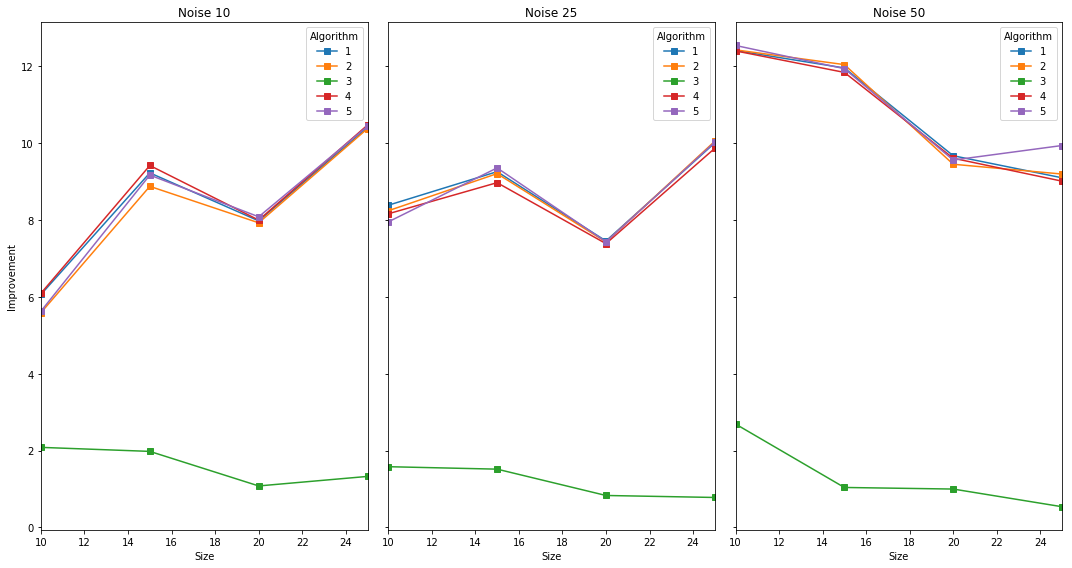

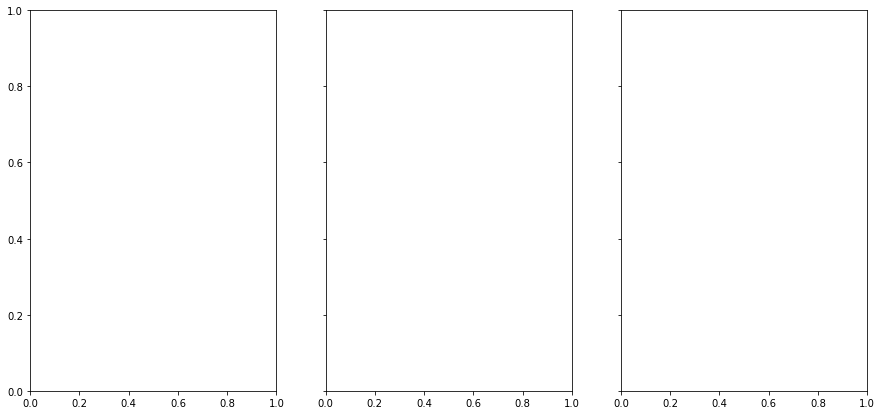

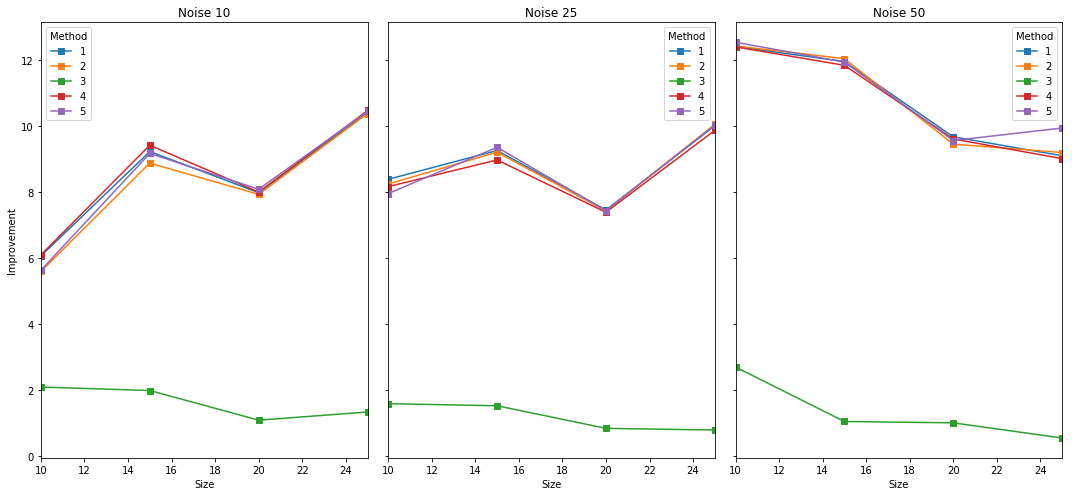

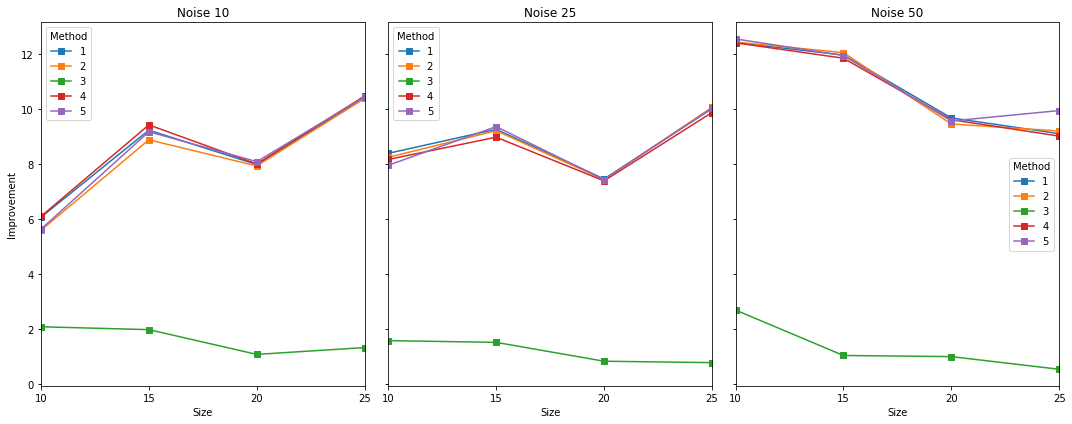

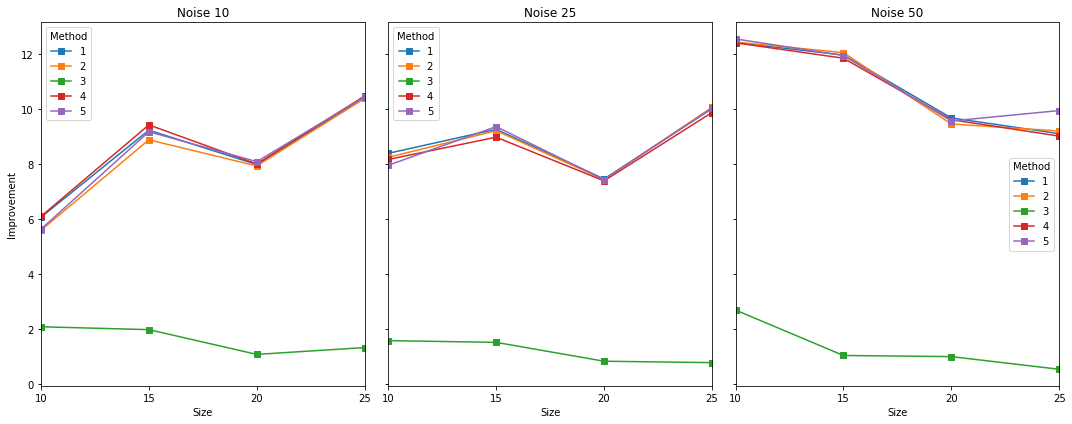

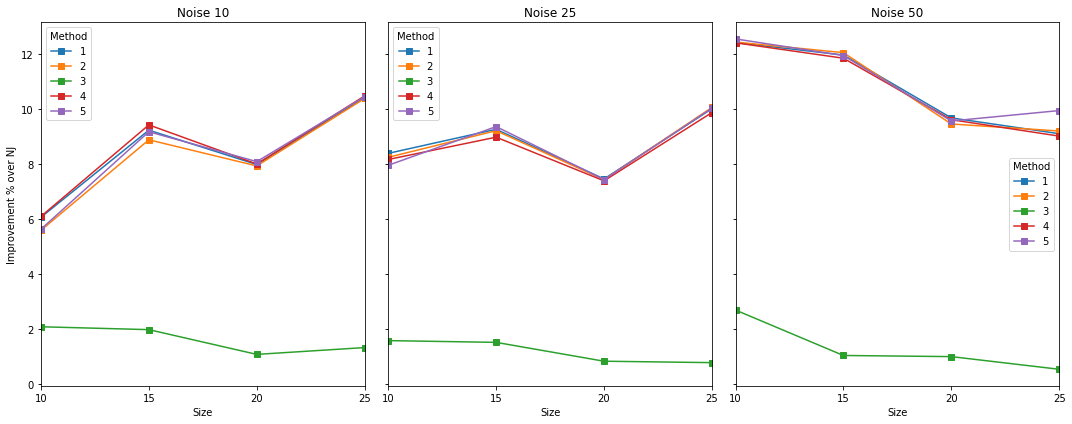

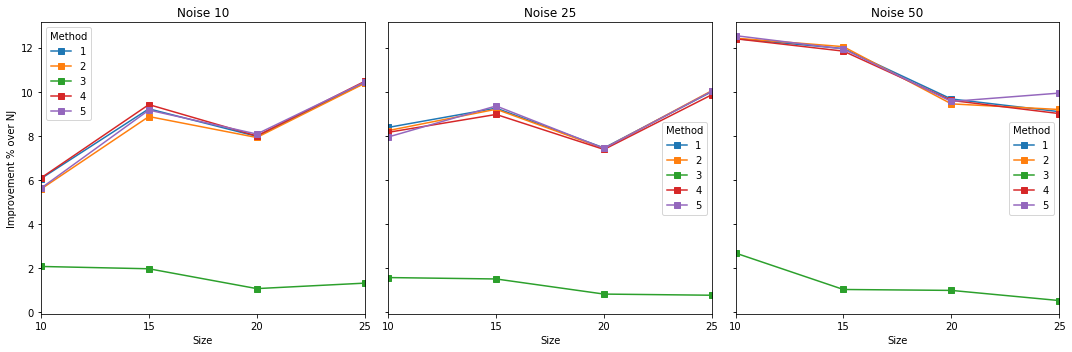

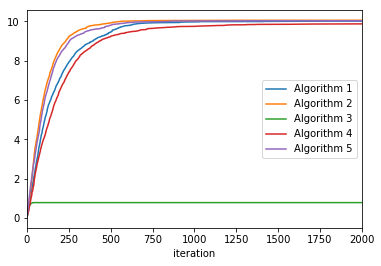

In [30]:
gen_table2()

In [31]:
def gen_mean_iter(n):
    dict_ = {}
    for i, file in enumerate(reversed(listdir('final_results/'))):
        if file.endswith("data_n{}_std25.csv".format(n)):
            df = pd.read_csv('final_results/'+file, names=['iteration', 'timestamp','fitness','dataset','matrix','algo'])
            df2 = pd.pivot_table(df, index='iteration', values='fitness', columns='matrix').apply(lambda x: 100-100*x/x.iloc[0])
            dict_['Method ' + file.split('_')[1][4]] = df2.mean(axis=1)
    frame = pd.DataFrame(dict_)

    #frame = pd.pivot_table(frame, index='iteration', values='fitness', columns='algo')
    #print frame.head()
    return frame

In [150]:
plt.show()

In [34]:
f, ax = plt.subplots(4, figsize=(10, 10), sharey=True, sharex=True)

gen_mean_iter(10).plot(ax=ax[0], title='Distance Matrix Size 10')
gen_mean_iter(15).plot(ax=ax[1], title='Distance Matrix Size 15')
gen_mean_iter(20).plot(ax=ax[2], title='Distance Matrix Size 20')
gen_mean_iter(25).plot(ax=ax[3], title='Distance Matrix Size 25')
for axis in ax:
    axis.set_ylabel('Improvement % over NJ')
plt.tight_layout()
plt.savefig('algcompare.png')